# Location Analysis
Here we explore the location of current Airbnb rentals in Mallorca, in particular the density of Airbnb rentals in the different neighborhoods.<br />
Input data: Airbnb data of Mallorca acquired on Jun 28th 2020 (http://insideairbnb.com/get-the-data.html)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

listings = pd.read_csv('listings.csv')
listings.latitude=listings.latitude/54.6*69

## Generate new feature: number_of_neighbors

In [9]:
# generate number of neibors with radius 11km (0.1 in longitude and latitude)
num_of_neigbors_per_property = 0
number_of_neighbors = []
for i in range(listings.shape[0]):
    selted_loc = np.tile(np.array([listings.longitude[i],listings.latitude[i]]),listings.shape[0]).reshape(listings.shape[0],-1)
    cf_loc = np.array([listings.longitude,listings.latitude]).T
    num_of_neigbors_per_property = (np.sqrt(np.sum((selted_loc-cf_loc)**2,axis=1))<=0.1).sum()
    number_of_neighbors.append(num_of_neigbors_per_property-1)
listings.insert(105, "number_of_neighbors", number_of_neighbors, True) 

## Identify top 5 neighborhoods most poulated by Airbnb rentals

In [10]:
neighborhood_top_five = listings.groupby('neighbourhood_cleansed').mean().number_of_neighbors.sort_values(ascending=False)[:5].index
neighborhood_top_five

Index(['Alcúdia', 'Pollença', 'Muro', 'Palma de Mallorca', 'Sa Pobla'], dtype='object', name='neighbourhood_cleansed')

## Visualize the spatial distribution of Airbnb properties on Mallorca
color: number of other Airbnb properties in 11km radius

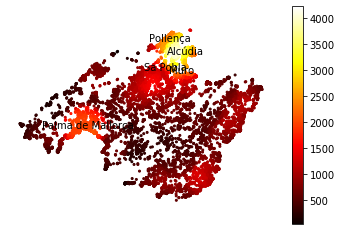

In [14]:
plt.scatter(listings.longitude,listings.latitude, c= listings.number_of_neighbors,cmap='hot',marker='o',s=4)
for nbh in neighborhood_top_five:
    plt.text(listings[listings.neighbourhood_cleansed==nbh].longitude.mean(),
             listings[listings.neighbourhood_cleansed==nbh].latitude.mean()
             ,nbh,horizontalalignment='center')
plt.axis('equal')
plt.axis('off')
plt.colorbar()
plt.savefig('Spatial_distribution_heatmap.png')